In [13]:
import sklearn
sklearn.__version__

'0.23.1'

In [40]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

## Read the provided dataset and understand the observations

In [33]:
# Read data set provided from the Kaggle competition website

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test3_df = pd.read_csv("test3.csv")

print("The training dataset contains {0} observations with {1} features for each observation.".\
    format(train_df.shape[0], train_df.shape[1]))
train_df.head()

The training dataset contains 15120 observations with 56 features for each observation.


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [34]:
print("The test dataset contains {0} observations with {1} features for each observation.".\
    format(test_df.shape[0], test_df.shape[1]))
test_df.head()

The test dataset contains 565892 observations with 55 features for each observation.


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [35]:
print("The test3 dataset contains {0} observations with {1} features for each observation.".\
    format(test3_df.shape[0], test3_df.shape[1]))
test3_df.head()

The test3 dataset contains 5 observations with 5 features for each observation.


,id,fruit,count,drinks,snacks
0,1,apple,2,4,hersheys
1,2,banana,3,3,ice cream
2,3,citrus,4,1,cookies
3,4,apple,3,3,donuts
4,5,durian,5,6,icepop


In [41]:
# Print all the column types and understand the names and data type in the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

## Review training dataset by looking at histograms

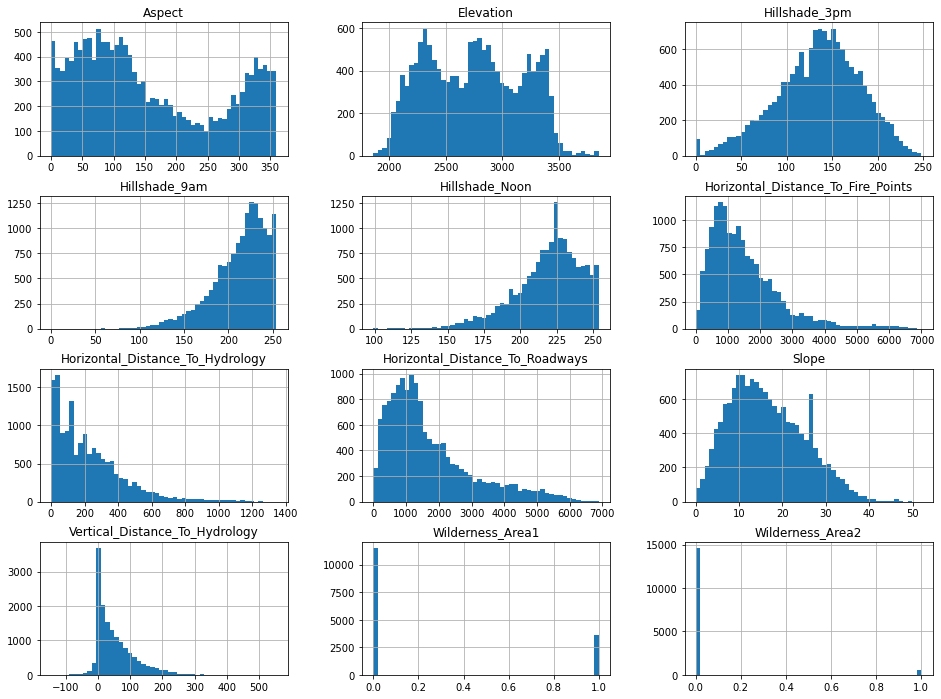

In [38]:
train_df.iloc[:,1:13].hist(figsize=(16,12),bins=50)
plt.show()

## Review test dataset by looking at histograms

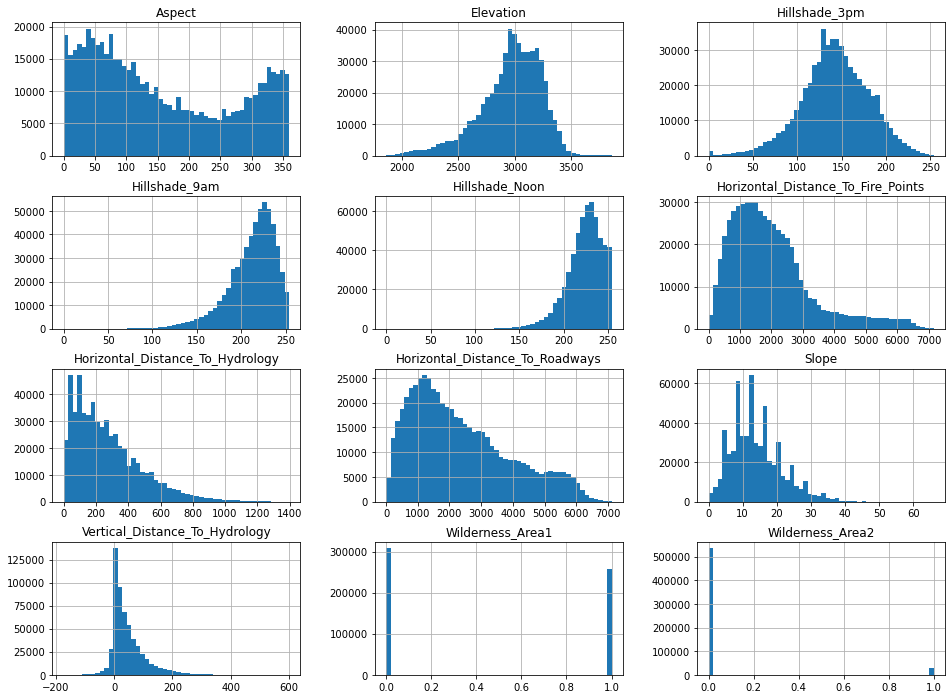

In [43]:
test_df.iloc[:,1:13].hist(figsize=(16,12),bins=50)
plt.show()

In the training and test dataset, the first 10 features of each observation (Elevation to Horizontal_Distance_To_Fire_Points) are continuous, with different ranges. The remaining 44 features are all binary. 4 of those 44 binary features correspond to Wilderness Area (i.e., there are 4 possible types), so any observation will have one 1 and three 0's in those columns. The last 40 features correspond to Soil Type (i.e., there are 40 possible types), so any observation will have one 1 and thirty-nine 0's in those columns.

## Split the training data into train and dev dataset

In [60]:
# Split the training data into train and dev data set.
# Read the training data into X and y
train_file = open("train.csv")
column_names_train = train_file.readline()
data = np.loadtxt(train_file, delimiter=",")

y, X = data[:, -1].astype('u1'), data[:, :-1]

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, y = X[shuffle], y[shuffle]

# Split the training data into 90% training data and 10% dev data
train_size = int(X.shape[0] * 0.9)

# Discard 1st feature (ID number that doesn't provide info about the label)
y_train, X_train = y[:train_size], X[:train_size, 1:]
y_dev, X_dev = y[train_size:], X[train_size:, 1:]
print(X_dev.shape, X_train.shape)

# Read the test data and store in X_test
test_file = open("test.csv")
column_names_test = test_file.readline()
data_test = np.loadtxt(test_file, delimiter=",")

# Save the test data in X_test. Test data does not have the 1st feature
X_test = data_test
X_test = X_test[:, 1:]
print(X_test.shape)

(1512, 54) (13608, 54)
(565892, 54)


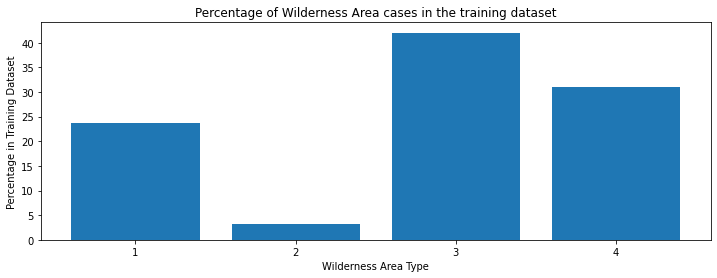

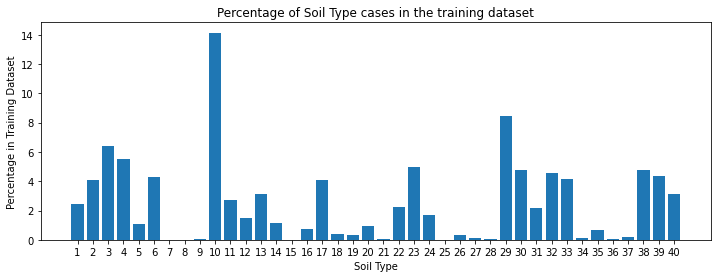

In [61]:
# Count the total number of observations that are wilderness area types
Wilderness = 100*X_train[:,10:14].sum(axis=0)/X_train[:,10:14].sum()

# Count the total number of observations that are different soil types
Soil = 100*X_train[:,14:54].sum(axis=0)/X_train[:,14:54].sum()

# Plot the distribution of wilderness area
plt.figure(figsize=(12, 4))
plt.bar(np.arange(4), Wilderness, align="center")
plt.title("Percentage of Wilderness Area cases in the training dataset")
plt.xticks(np.arange(4), np.array([str(i) for i in np.arange(1,5)]))
plt.xlabel("Wilderness Area Type")
plt.ylabel("Percentage in Training Dataset")

# Plot the distribution of soil type
plt.figure(figsize=(12, 4))
plt.bar(np.arange(40), Soil, align="center")
plt.title("Percentage of Soil Type cases in the training dataset")
plt.xticks(np.arange(40), np.array([str(i) for i in np.arange(1,41)]))
plt.xlabel("Soil Type")
plt.ylabel("Percentage in Training Dataset")

plt.show()

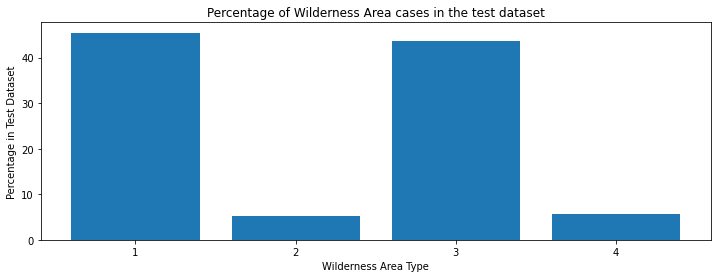

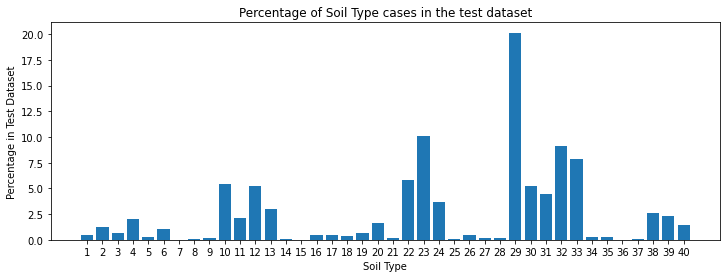

In [62]:
# Count the total number of observations that are wilderness area types
Wilderness = 100*X_test[:,10:14].sum(axis=0)/X_test[:,10:14].sum()

# Count the total number of observations that are different soil types
Soil = 100*X_test[:,14:54].sum(axis=0)/X_test[:,14:54].sum()

# Plot the distribution of wilderness area
plt.figure(figsize=(12, 4))
plt.bar(np.arange(4), Wilderness, align="center")
plt.title("Percentage of Wilderness Area cases in the test dataset")
plt.xticks(np.arange(4), np.array([str(i) for i in np.arange(1,5)]))
plt.xlabel("Wilderness Area Type")
plt.ylabel("Percentage in Test Dataset")

# Plot the distribution of soil type
plt.figure(figsize=(12, 4))
plt.bar(np.arange(40), Soil, align="center")
plt.title("Percentage of Soil Type cases in the test dataset")
plt.xticks(np.arange(40), np.array([str(i) for i in np.arange(1,41)]))
plt.xlabel("Soil Type")
plt.ylabel("Percentage in Test Dataset")

plt.show()


----------------------------------------------------

For k: 1
              precision    recall  f1-score   support

           1       0.80      0.67      0.73       220
           2       0.72      0.66      0.69       208
           3       0.85      0.81      0.83       220
           4       0.94      0.96      0.95       212
           5       0.89      0.96      0.93       227
           6       0.83      0.91      0.87       206
           7       0.90      0.99      0.95       219

    accuracy                           0.85      1512
   macro avg       0.85      0.85      0.85      1512
weighted avg       0.85      0.85      0.85      1512


----------------------------------------------------

For k: 1 Match: 1291 Mismatch: 221 Total: 1512 Accuracy: 0.854
For k: 3 Match: 1258 Mismatch: 254 Total: 1512 Accuracy: 0.832
For k: 5 Match: 1236 Mismatch: 276 Total: 1512 Accuracy: 0.817
For k: 7 Match: 1214 Mismatch: 298 Total: 1512 Accuracy: 0.803
For k: 9 Match: 1200 Mismatch: 3

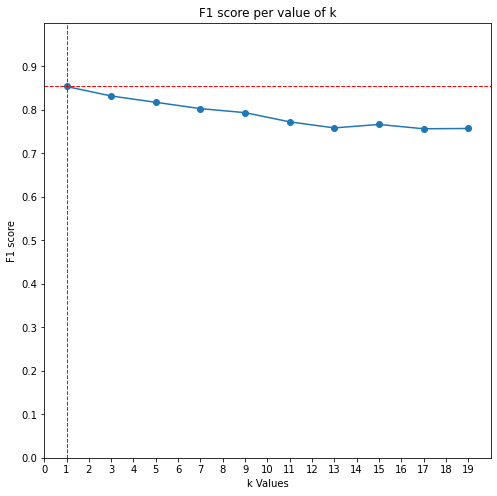



--------------------------------------------------------------------
The optimal value for k using GridSearchCV method is 1


In [95]:
def P2(k_values):

    '''
    KNN can be used for both classification and regression predictive problems. However, it is more widely 
    used in classification problems in the industry. The classification is based on the class of the neighbors.
    With increasing k value or more neighbors considered for classification, the boundary becomes smooth. The 
    training error rate and the validation error rate are two parameters we need to access different K-value. 
    In this code, we are studying the effect of k-value.'''
    
    # We use KNeighborsClassifier() from the Scikit-Learn Python library to start. 
    # This function takes many arguments, but we will only have to worry about a few in this example. 
    # Specifically, we will only be passing a value for the n_neighbors argument (this is the k value). 
    # For weights we will use default value as uniform, meaning each of the k points is equally weighted
    # The algorithm argument will also be left at its default value of auto
    
    # Run through the 5 k_values passed in (1, 3, 5, 7, and 9)

    accuracy = []
    for k in k_values:
        
        # train model using K-NN and the mini_train data and mini_train_labels
        knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_model.fit(X_train, y_train)
        
        # Use the knn model developed with mini_train_data and predict lables
        # Supply dev_data to the model and get the predicted labels
        prediction_labels = knn_model.predict(X_dev)
        
        # Determine the score
        score = knn_model.score(X_dev, y_dev)
        accuracy.append(score)
        
        # Check number of match and mismatch predictions. Are predicted and dev labels matching?
        # If predicted labels for dev data matches dev labels, call it a match. If not, it is mismatch
        match = []
        mismatch = []
        match = (prediction_labels == y_dev)
        mismatch = (prediction_labels != y_dev)
        total = np.sum(match) + np.sum(mismatch)

        # The classification report visualizer displays the precision, recall, F1 for model
        # Precision can be seen as a measure of a classifier’s exactness. 
        # For each class, it is defined as the ratio of true positives to the sum of true and false positives. 
        # Recall is a measure of the ability of a classifier to correctly find all positive instances. 
        # The F1 score is a weighted harmonic mean of precision and recall 
        # For F1, the best score is 1.0 and the worst is 0.0.
        # Support is the number of actual occurrences of the class in the specified dataset. 

        # Printing the output
        if (k == 1):
            print("\n----------------------------------------------------\n")
            print("For k: %d" % k)
            print(classification_report(y_dev, prediction_labels))
            print("\n----------------------------------------------------\n")
            print("For k: %d Match: %d Mismatch: %d Total: %d Accuracy: %.3f"
                  % (k, np.sum(match), np.sum(mismatch), np.sum(total), score))
        else:
            print("For k: %d Match: %d Mismatch: %d Total: %d Accuracy: %.3f"
                  % (k, np.sum(match), np.sum(mismatch), np.sum(total), score))
            
    return accuracy

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuracy = P2(k_values)

print("----------------------------------------------------------")
("Plot the accuracy against k-values using the manual method")
plt.figure(figsize=(8, 8))
plt.plot(k_values, accuracy, marker='o')
plt.xlabel("k Values")
plt.ylabel("F1 score")
plt.title('F1 score per value of k')
plt.ylim([0, 1])
plt.xlim([0, max(k_values)+1])
plt.xticks(np.arange(0, max(k_values)+1, 1))
plt.yticks(np.arange(0, 1, 0.1))
plt.axvline(x=1, linewidth=1, linestyle='--', color='red')
plt.axhline(y=max(accuracy), linewidth=1, linestyle='--', color='red')
plt.show()

#-------------------------------------------------------------------------
# Use Gridsearch method to estimate optimal value of k and accuracy
#-------------------------------------------------------------------------

# Estimate by cross-validation the optimal number of neighbors (k)
# Based on the previous results, we know k=1. So, try till k=20
k = {'n_neighbors': np.concatenate([np.arange(1, 20+1)]).tolist()}

best_param_kNN = GridSearchCV(KNeighborsClassifier(), k, scoring='accuracy')
best_param_kNN.fit(X_train, y_train)
optimal_k = best_param_kNN.best_params_['n_neighbors']
print("\n")
print("--------------------------------------------------------------------")
print("The optimal value for k using GridSearchCV method is {0}".format(optimal_k))

# Using K-NN model which cover types are most confused?

In [93]:
# Build a model using KNN-1. Use train set to train the model
confusion_model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
confusion_model.fit(X_train, y_train)

# Create the confusion matrix for the dev_data
# Confusion matrix prints comparison of dev labels against predicted labels
predicted_labels = confusion_model.predict(X_dev)
confusion = confusion_matrix(y_dev, predicted_labels)
print("\n------------ Confusion Matrix -----------\n")
print(confusion)

# From matrix find out most confused digits
# For the confusion matrix rows and columns, iterate through the top part
# of the triangle and sum the pair of indices to find most errors between pairs
confused_row, confused_column, confused_count = 0, 1, 0
rows, columns = np.shape(confusion)
for i in range(rows):
    for j in range(i+1, columns):
        errors = confusion[i][j] + confusion[j][i]
        if errors > confused_count:
            confused_row = i
            confused_column = j
            confused_count = errors
    
# We print a combined number of errors. It is errors between pairs
    
print("---------------------------------------------------------------\n")
print("Most confused cover types are: " + str(confused_row) + " and " + str(confused_column) + 
      ", with " + str(confused_count) + " number of errors.\n")
print("---------------------------------------------------------------")    


------------ Confusion Matrix -----------

[[148  41   0   0   9   1  21]
 [ 34 138  12   0  14   8   2]
 [  0   4 178  12   1  25   0]
 [  0   0   4 204   0   4   0]
 [  0   7   0   0 219   1   0]
 [  0   1  15   1   2 187   0]
 [  2   0   0   0   0   0 217]]
---------------------------------------------------------------

Most confused cover types are: 0 and 1, with 75 number of errors.

---------------------------------------------------------------


In [102]:
# import training data from relative filepath
data = pd.read_csv("train.csv")

# extract training data except labels and ID column
train_df = data.loc[:, (data.columns != "Cover_Type") & (data.columns != "Id")]

# extract labels from training data
train_labels_df = data.loc[:, "Cover_Type"]

# import test data from relative filepath
test_data = pd.read_csv("test.csv")

# extract test data except ID column
test_df = test_data.loc[:, test_data.columns != "Id"]

# train model using K-NN and the mini_train data and mini_train_labels
knn_model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_model.fit(train_df, train_labels_df)

# Supply the test_df to knn_model and create predictions
predictions = knn_model.predict(test_df)

# converts predictions from np array to pd dataframe
predictions_df = pd.DataFrame(data = predictions, index = test_data.loc[:, "Id"], columns = ["Cover_Type"])

predictions_df

,Cover_Type
Id,
15121,2
15122,2
15123,1
15124,1
15125,1
...,...
581008,3
581009,3
581010,3


In [103]:
# outputs to csv file
predictions_df.to_csv("knn_predictions.csv")

When submitted into kaggle, it provided a score of 0.71016 a leadership board rank of 1179.

In [118]:
# Develop Gaussian Naive Bayes model

'''Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution 
and supports continuous data'''

GNB_model = GaussianNB()
GNB_model.fit(X_train[:,:10], y_train)

# Predict the labels by passing the dev data that was split out from train data
dev_predicted_labels = GNB_model.predict(X_dev[:,:10])

# Print accuracy scores
print(metrics.accuracy_score(y_true=y_dev, y_pred=dev_predicted_labels))
print(metrics.classification_report(y_dev, dev_predicted_labels))

0.5906084656084656
              precision    recall  f1-score   support

           1       0.55      0.56      0.55       220
           2       0.50      0.42      0.46       208
           3       0.50      0.40      0.44       220
           4       0.71      0.78      0.74       212
           5       0.62      0.69      0.65       227
           6       0.45      0.47      0.46       206
           7       0.75      0.80      0.78       219

    accuracy                           0.59      1512
   macro avg       0.58      0.59      0.58      1512
weighted avg       0.58      0.59      0.58      1512



In [119]:
# Develop Gaussian Naive Bayes model
GNB_model = GaussianNB()
GNB_model.fit(train_df, train_labels_df)

# Supply the test_df to GNB_model and create predictions
predictions = GNB_model.predict(test_df)

# converts predictions from np array to pd dataframe
predictions_NB_df = pd.DataFrame(data = predictions, index = test_data.loc[:, "Id"], columns = ["Cover_Type"])

predictions_NB_df

,Cover_Type
Id,
15121,2
15122,2
15123,1
15124,2
15125,2
...,...
581008,3
581009,3
581010,3


In [120]:
# outputs to csv file
predictions_NB_df.to_csv("nb_predictions.csv")

When submitted into kaggle, it provided a score of 0.42149 much lower than K-NN